![title](img/header.png)

In [3]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

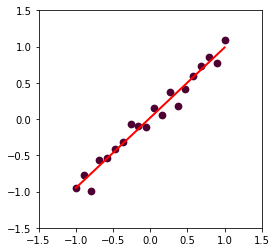

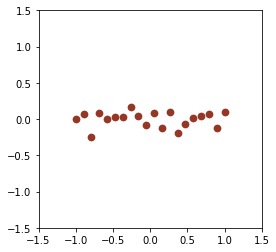

In [4]:
# Linier Regresi Example Ke-1
points = 20
x=np.linspace(-1,1,points)
y=x+0.1*np.random.normal(size=points)
slope,intercept,r_value,p_value,std_err   = stats.linregress(x,y)
y_line=slope*x+intercept

fig, (ax1) = plt.subplots(1,figsize=(4,4))
ax1.scatter(x,y,color='#4D0132',lw=0,s=60)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])
ax1.plot(x,y_line,color='red',lw=2)
fig.savefig('Linier.png')

fig, (ax1) = plt.subplots(1,figsize=(4,4))
ax1.scatter(x,y-y_line, color='#963725',lw=0,s=60)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])
fig.savefig('Linier-residuals.png')

plt.show()
plt.close()

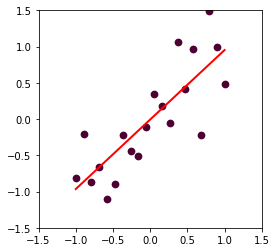

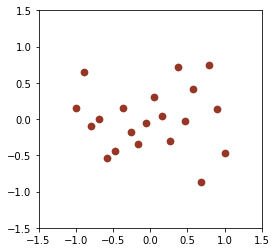

In [5]:
# Linier Regresi Example Ke-2
x=np.linspace(-1,1,points)
y=x+0.4*np.random.normal(size=points)
slope,intercept,r_value,p_value,std_err   = stats.linregress(x,y)
y_line=slope*x+intercept

fig, (ax1) = plt.subplots(1,figsize=(4,4))
ax1.scatter(x,y,color='#4D0132',lw=0,s=60)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])
ax1.plot(x,y_line,color='red',lw=2)
fig.savefig('Linier-Lemah.png')

fig, (ax1) = plt.subplots(1,figsize=(4,4))
ax1.scatter(x,y-y_line, color='#963725',lw=0,s=60)
ax1.set_xlim([-1.5,1.5])
ax1.set_ylim([-1.5,1.5])
fig.savefig('Linier-Lemah-residuals.png')

plt.show()
plt.close()

In [6]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Ref: http://www.professorwidom.org/materials
# Read Cities.csv into dataframe
f = open('Cities.csv','r')
cities = pd.read_csv(f)

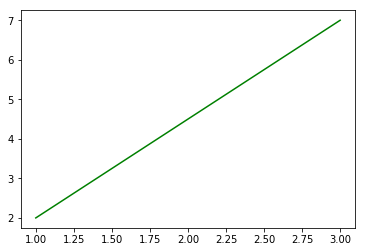

In [8]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

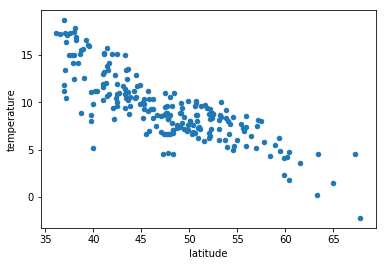

In [9]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter(x='latitude', y='temperature')
plt.show()

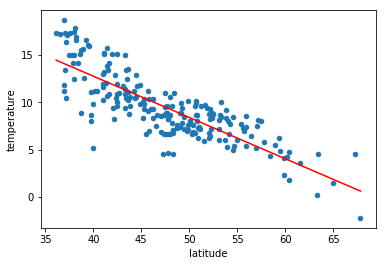

In [10]:
# Add linear regression
cities.plot.scatter(x='latitude', y='temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [11]:
# Correlation coefficients (r values)
cc = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print ('Correlation coefficient for temperature versus latitude:', cc)
cc = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print ('Correlation coefficient for temperature versus longitude:', cc)

Correlation coefficient for temperature versus latitude: -0.824104632027
Correlation coefficient for temperature versus longitude: -0.169307504036


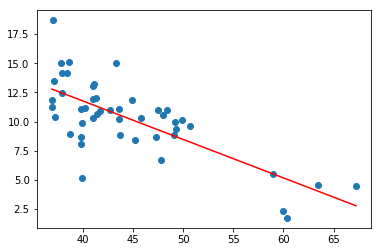

Enter city name (or "quit" to quit): Amsterdam
Predicted temperature: 7.68855452617
Actual temperature: 8.93
Enter city name (or "quit" to quit): quit


In [12]:
# Use linear regression for interactive temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]
# Compute and show regression
plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    #name = raw_input('Enter city name (or "quit" to quit): ')
    name = input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities.city == name]
    if len(city) == 0:
        print ('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print ('Predicted temperature:', a * float(city.latitude) + b)
        print ('Actual temperature:', float(city.temperature))

### <font color="green">Your Turn: World Cup Data</font>

In [13]:
# Read Players.csv into dataframe
f = open('Players.csv','r')
players = pd.read_csv(f)

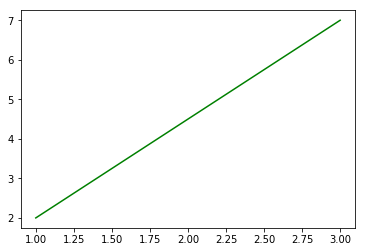

In [14]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

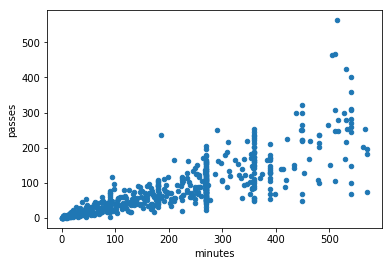

In [15]:
# Recall minutes versus passes scatterplot
players.plot.scatter(x='minutes', y='passes')
plt.show()

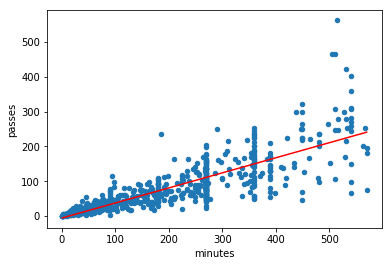

In [16]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
# Reminder: copy-paste-modify approach to programming!
players.plot.scatter(x='minutes', y='passes')
a,b = np.polyfit(players.minutes, players.passes, 1) # Regression line is y = ax + b
x1 = min(players.minutes)
x2 = max(players.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [17]:
# Show the correlation coefficient for the passes-minutes regression.
# Also show correlation coefficients for tackles versus minutes, shots
# versus minutes, and saves versus minutes

cc = np.corrcoef(players.passes, players.minutes)[1,0]
print ('Correlation coefficient for the passes-minutes regression:', cc)
cc = np.corrcoef(players.tackles, players.minutes)[1,0]
print ('Correlation coefficient for tackles versus minutes:', cc)
cc = np.corrcoef(players.shots, players.minutes)[1,0]
print ('Correlation coefficient for shots versus minutes:', cc)
cc = np.corrcoef(players.saves, players.minutes)[1,0]
print ('Correlation coefficient for saves versus minutes:', cc)

Correlation coefficient for the passes-minutes regression: 0.815119315795
Correlation coefficient for tackles versus minutes: 0.610673461384
Correlation coefficient for shots versus minutes: 0.407923077405
Correlation coefficient for saves versus minutes: 0.228477232531


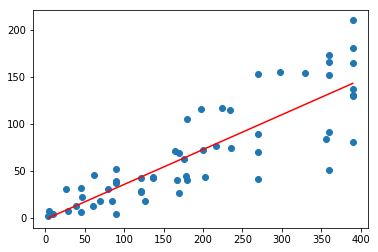

Enter surname (or "quit" to quit): Ziani
Predicted passes: 87.2533730358
Actual passes: 93.0
Enter surname (or "quit" to quit): quit


In [18]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal

train = players[(players.team=='Greece') | (players.team=='USA') | (players.team=='Portugal')]
# Compute and show regression
plt.scatter(train.minutes, train.passes)
a,b = np.polyfit(train.minutes, train.passes, 1)
x1 = min(train.minutes)
x2 = max(train.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()
# Loop asking user for surname, compute predicted + actual temperature
while True:
    #name = raw_input('Enter surname(or "quit" to quit): ')
    name = input('Enter surname (or "quit" to quit): ')
    if name == 'quit': break
    surname = players[players.surname == name]
    if len(surname) == 0:
        print ('surname not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print ('Predicted passes:', a * float(surname.minutes) + b)
        print ('Actual passes:', float(surname.passes))

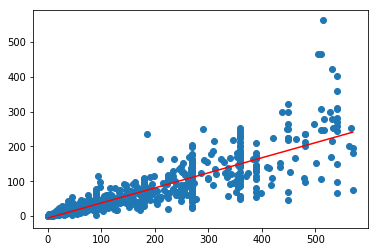

Enter surname (or "quit" to quit): Ziani
Predicted passes: 98.0124699363
Actual passes: 93.0
Enter surname (or "quit" to quit): quit


In [19]:
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.

train = players[(players.position=='midfielder') | (players.position=='defender') | (players.position=='goalkeeper')| (players.position=='forward')]
# Compute and show regression
plt.scatter(train.minutes, train.passes)
a,b = np.polyfit(train.minutes, train.passes, 1)
x1 = min(train.minutes)
x2 = max(train.minutes)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()
# Loop asking user for surname, compute predicted + actual temperature
while True:
    #name = raw_input('Enter surname(or "quit" to quit): ')
    name = input('Enter surname (or "quit" to quit): ')
    if name == 'quit': break
    surname = players[players.surname == name]
    if len(surname) == 0:
        print ('surname not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print ('Predicted passes:', a * float(surname.minutes) + b)
        print ('Actual passes:', float(surname.passes))

# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string

![title](img/thumbs-up.png)